In [1]:
## . . Import the plotting and libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from prettytable import PrettyTable

## . . For animation
from matplotlib import animation
from IPython.display import HTML

<h1><center>LAB 2 - Finite Differences, Discretization and the 2D Advection Equation</center></h1>


## DUE: September 10, 2020 by 11:59pm

## NAME: David Churchwell $\hspace{2.5in}$                                STUDENT NUMBER: 10736518

The purpose of this lab is to get you thinking about finite-difference approximations, partial differential discretizations, and their use in solving the 2D advection equation.

###### Part 1 - Deriving finite-difference approximations

In the course notes we explored how to develop first- and second-order accurate Taylor-series approximations (i.e., $\mathcal{O}(\Delta t)$ and $\mathcal{O}(\Delta t^2)$, respectively) of a first-derivative operator as well as a second-order accurate Taylor-serieapproximation of the second-derivative operator.  However, we did not derive a **fourth-order accurate** approximation of the **second-derivative** operator.

**Q1-1**: Show that the **fourth-order accurate second-derivative** Taylor-series approximation can be written as 

$$f^{\prime\prime}(t) \approx \frac{1}{\Delta t^{2}}\sum_{k=-2}^{2} c_n f(t+k\Delta t), \tag{1} $$

where

$$\left[c_{-2},c_{-1},c_{0},c_{1},c_{2}\right] = \left[-\frac{1}{12},\frac{4}{3}, -\frac{5}{2}, \frac{4}{3},−\frac{1}{12}\right]. \tag{2}$$

Note: You can either $\LaTeX$ your solution or write it out by hand, take a photo, and embed it in your Jupyter notebook (don't forget to include it with your submission).

**Answer**

We can start with the formal definition for a function, $f(t)$, second derivative.

$$
f''(t) = \lim_{\Delta t\rightarrow0} \frac{f(t+\Delta t)-2f(t)+f(t-\Delta t)}{\Delta t^{2}}
$$

Since we want this discretized, we cannot make $\Delta t\rightarrow0$. Thus, we can define a sampling rate, $\Delta t$ to get a numerical approximation of the continuous second derivative with an error term of $\mathcal{O}(\Delta t^{4})$. We want $\Delta t$ to be raised to the fourth power since we want a fourth-order derivative.

$$
f''(t) = \frac{\partial^{2}f}{\partial t^{2}} = \frac{f(t+\Delta t)-2f(t)+f(t-\Delta t)}{\Delta t^{2}} + \mathcal{O}(\Delta t^{4}) \tag{1-1}
$$

From here, we can take advantage of Taylor Series to create 4 series that can be summed together in order to get a result similar to the right side of equation 1-1. Here are the four Taylor Series expansions:

$$
\begin{eqnarray}
f(t+\Delta t) &=& f(t) + \Delta tf'(t) + \Delta t^{2}\frac{f''(t)}{2!} + \Delta t^{3}\frac{f'''(t)}{3!} + \Delta t^{4}\frac{f^{(4)}(t)}{4!} + \Delta t^{5}\frac{f^{(5)}(t)}{5!} + \Delta t^{6}\frac{f^{(6)}(t)}{6!} \tag{1-2a}\\
f(t-\Delta t) &=& f(t) - \Delta tf'(t) + \Delta t^{2}\frac{f''(t)}{2!} - \Delta t^{3}\frac{f'''(t)}{3!} + \Delta t^{4}\frac{f^{(4)}(t)}{4!} - \Delta t^{5}\frac{f^{(5)}(t)}{5!} + \Delta t^{6}\frac{f^{(6)}(t)}{6!} \tag{1-2b}\\
f(t+2\Delta t) &=& f(t) + 2\Delta tf'(t) + 4\Delta t^{2}\frac{f''(t)}{2!} + 8\Delta t^{3}\frac{f'''(t)}{3!} + 16\Delta t^{4}\frac{f^{(4)}(t)}{4!} + 32\Delta t^{5}\frac{f^{(5)}(t)}{5!} + 64\Delta t^{6}\frac{f^{(6)}(t)}{6!} \tag{1-2c}\\
f(t-2\Delta t) &=& f(t) - 2\Delta tf'(t) + 4\Delta t^{2}\frac{f''(t)}{2!} - 8\Delta t^{3}\frac{f'''(t)}{3!} + 16\Delta t^{4}\frac{f^{(4)}(t)}{4!} - 32\Delta t^{5}\frac{f^{(5)}(t)}{5!} + 64\Delta t^{6}\frac{f^{(6)}(t)}{6!} \tag{1-2d}\\
\end{eqnarray}
$$

Now, we can sum equations 1-2a and 1-2b together (and scale this result by 16 so that we match $f^{(4)}$ terms.) 

$$
16f(t+\Delta t) + 16f(t-\Delta t) = 32f(t) + 32\Delta t^{2}\frac{f''(t)}{2!} + 32\Delta t^{4}\frac{f^{(4)}(t)}{4!} + 32\Delta t^{6}\frac{f^{(6)}(t)}{6!} \tag{1-3a}
$$

and sum equations 1-2c and 1-2d together


$$
f(t+2\Delta t) + f(t-2\Delta t) = 2f(t) + 8\Delta t^{2}\frac{f''(t)}{2!} + 32\Delta t^{4}\frac{f^{(4)}(t)}{4!} + 128\Delta t^{6}\frac{f^{(6)}(t)}{6!} \tag{1-3b}
$$

Now we find the difference between equations 1-3a and 1-3b to get the following:

$$
16f(t+\Delta t) + 16f(t-\Delta t) - f(t+2\Delta t) - f(t-2\Delta t) = 30f(t) + 24\Delta t^{2}\frac{f''(t)}{2!} - 96\Delta t^{6}\frac{f^{(6)}(t)}{6!} \tag{1-4}
$$

Now we can solve for the accuracy term:

$$
\begin{eqnarray}
16f(t+\Delta t) + 16f(t-\Delta t) - f(t+2\Delta t) - f(t-2\Delta t) - 30f(t) = 24\Delta t^{2}\frac{f''(t)}{2!} - 96\Delta t^{6}\frac{f^{(6)}(t)}{6!} \\
\frac{16f(t+\Delta t) + 16f(t-\Delta t) - f(t+2\Delta t) - f(t-2\Delta t) - 30f(t)}{\Delta t^{2}} - 12f''(t)= - 96\Delta t^{4}\frac{f^{(6)}(t)}{6!} \\
\frac{\big(16f(t+\Delta t)- f(t+2\Delta t)\big) - 30f(t) + \big(16f(t-\Delta t) - f(t-2\Delta t)\big)}{12\Delta t^{2}} - f''(t)= -\frac{8\Delta t^{4}f^{(6)}}{6!} \tag{1-5}
\end{eqnarray}
$$

Per equation 1-1, the accuracy term is $f''(t) - \frac{f(t+\Delta t)-2f(t)+f(t-\Delta t)}{\Delta t^{2}}$. This is the opposite of equation 1-5, meaning that we have found $-\mathcal{O}(\Delta t^{4})$. Thus, we multiply by negative to obtain the error that is associated with equation 1-1. Thus, our final answer for the error term is:

$$
\mathcal{O}(\Delta t^{4}) = \frac{8\Delta t^{4}f^{(6)}}{6!} \tag{1-6}
$$

making our 4th-order approximation:

$$
f''(t) \approx \frac{\big(16f(t+\Delta t)- f(t+2\Delta t)\big) - 30f(t) + \big(16f(t-\Delta t) - f(t-2\Delta t)\big)}{12\Delta t^{2}}
$$

Organizing this in a manner to make an equivalence with the $c_{k}$ terms above, we get:

$$
f''(t) \approx \Big(-\frac{1}{12}\Big)\frac{f(t-2\Delta t)}{\Delta t^{2}} + \frac{4}{3}\frac{f(t-\Delta t)}{\Delta t^{2}} + \Big(-\frac{5}{2}\Big)\frac{f(t)}{\Delta t^{2}} + \frac{4}{3}\frac{f(t+\Delta t)}{\Delta t^{2}} + \Big(-\frac{1}{12}\Big)\frac{f(t+2\Delta t)}{\Delta t^{2}} \tag{1-7}
$$

Noticing that the coefficients for each term in equation 1-7 are the same as those identified in $c_{k}$, and that $\frac{1}{\Delta t^{2}}$ can be factored out, we can simply turn equation 1-7 into a sum:

$$
f''(t) \approx \frac{1}{\Delta t^{2}}\sum_{k=-2}^{2}c_{k}f(t-k\Delta t), \quad c_{k} = \left[-\frac{1}{12},\frac{4}{3}, -\frac{5}{2}, \frac{4}{3},−\frac{1}{12}\right] \tag{1-8}
$$

We now have equation 1-8, which is the same as equation 1.

## Part 2 - Applying finite-difference approximations

When modeling seismic and GPR data, we often use the [Ricker wavelet](https://en.wikipedia.org/wiki/Mexican_hat_wavelet) to characterize the source function that is used to excite waves throughout the subsurface. The Ricker wavelet is given by the following equation:

$$\psi (t)={\frac {2}{{\sqrt {3\sigma }}\pi ^{1/4}}}\left(1-\left({\frac {t-t_0}{\sigma }}\right)^{2}\right)e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}. \tag{3} $$

where $\sigma$ controls the width of the wavelet and $t_0$ is used to shift its horizontal location. Here is an example for $\sigma=0.04$ and $t_0=2.0$s.

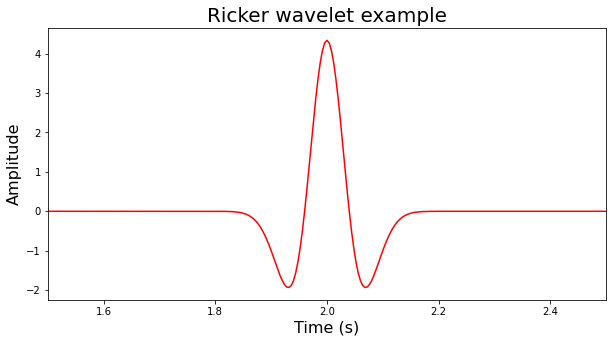

In [2]:
## . Define time axis
nt,dt=1024,0.004
t = np.arange(0,nt)*dt

## . . Define ricker parameters
ss,t0 = 0.04,2.0
R = 2/np.sqrt(3*ss*np.sqrt(np.pi))*(1-((t-t0)/ss)**2)*np.exp(-(t-t0)**2/(2*ss**2))

## . . Plot wavelet
plt.figure(figsize=(10,5))
plt.plot(t,R,'r')
plt.xlim(1.5,2.5);plt.xlabel('Time (s)',fontsize=16);plt.ylabel('Amplitude',fontsize=16)
plt.title('Ricker wavelet example',fontsize=20)
plt.show()

Let's now say that we want to compute the time derivative of equation 3 both analytically (i.e., $\psi^\prime(t)$) and numerically with different orders of Taylor-series finite-difference approximation (i.e., $\psi^\prime_{(n)}(t)$ where subscript $n$ stands for a $\mathcal{O}(\Delta t^n)$ accurate approximation).  

This question looks at how the percentage error $\epsilon$ between the analytic and numerical changes as a function of $\sigma$ (a proxy for frequency) in equation 3 for the approximation order $n$:

$$\epsilon(t,\sigma,n) = 100 \frac{\left( \psi^\prime(t) - \psi^\prime_{(n)}(t)\right)}{N} \tag{4}$$

where $N$ is a normalization factor, which I've taken to be the **maximum** of $|\Psi^{\prime}(t)|$ where $|\cdot|$ represent absolute value signs.

**Q2-1**: What is the **analytic** derivative of the Ricker wavelet in equation 3 (i.e., $\psi^\prime(t)$)?

**Analytical Derivative**

Start with the function:

$$
\psi (t)={\frac {2}{{\sqrt {3\sigma }}\pi ^{1/4}}}\left(1-\left({\frac {t-t_0}{\sigma }}\right)^{2}\right)e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}} 
$$

For simplcity, I wll define:

$$
c = {\frac {2}{{\sqrt {3\sigma }}\pi ^{1/4}}}
$$

Making the function:

$$
\psi (t) = c\left(1-\left({\frac {t-t_0}{\sigma }}\right)^{2}\right)e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}} 
$$

Now, to take the analytical derivative, we use the power rule and chain rule to get the following:

$$
\psi'(t) = c\Bigg[\frac{-2(t-t_{0})}{\sigma^{2}}e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}} + \Big(-\frac{(t-t_{0})}{\sigma^{2}}\Big)e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\Big(1-\Big(\frac{t-t_{0}}{\sigma}\Big)\Big)\Bigg]
$$

We can factor out $-\frac{(t-t_{0})}{\sigma^{2}}e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}$ to get the following:

$$
\psi'(t) = c\Big(-\frac{(t-t_{0})}{\sigma^{2}}e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\Big)\Bigg[\Big(\frac {t-t_0}{\sigma }\Big) + 1\Bigg]
$$

Substituting $c$ back into the equation, the final solution for the analytical derivative is:

$$
\psi'(t) = \Bigg({\frac {2}{{\sqrt {3\sigma }}\pi ^{1/4}}}\Bigg)\Bigg(-\frac{(t-t_{0})}{\sigma^{2}}e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\Bigg)\Bigg[\Big(\frac {t-t_0}{\sigma }\Big) + 3\Bigg]
$$

**Q2-2**: Let's now look at the accuracy of different orders of numerical first-derivative operators. Perform the following 5 steps:

(1) Create a time axis with $nt=1024$ samples at interval $dt=0.004$ s and then define a Ricker wavelet assuming $\sigma=0.01$ and $t_0=2$ in equation 3 above.

(2) Create 4 short arrays with the coefficients for the 2nd-, 4th-, 6th- and 8th-order first-derivative approximations.

(3) Apply the first-derivative filters using four calls to python's convolution routine
   
       np.convolve(ricker,filter,mode='same')
   
like (most of) you implemented in the previous Digital Signal Processing course.  It would be good practice to put the filtering steps into a function that can be called later in question 2-4 below.
   
(4) Include a subplot showing the analytic derivative and the 4 different numerical approximations (in different colors) on top of each other and include a legend.

(5) Include an **error** subplot showing the **differences** between the analytic and 4 orders of numerical first derivatives.

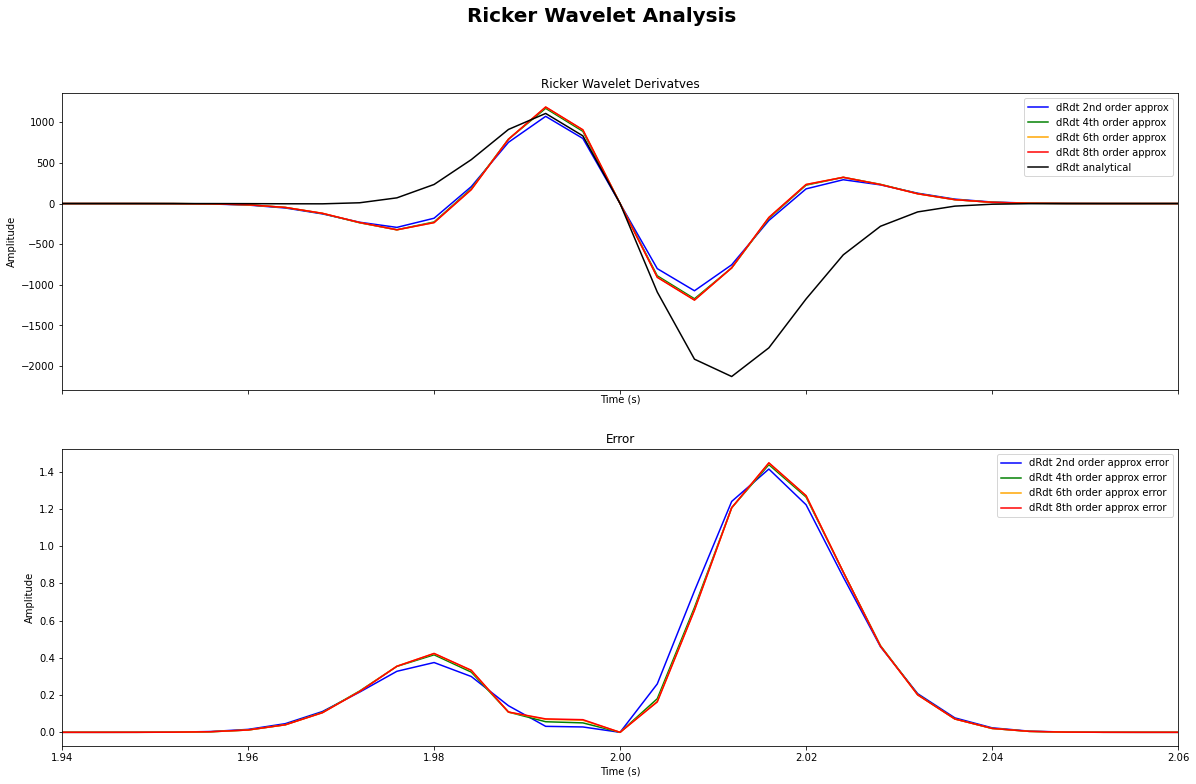

In [3]:
#make time axis with specified parameters
nt = 1024
dt = 0.004

t = np.arange(0, nt, dt)

#creating the ricker wavelet
sigma = 0.01
t0 = 2.0

R = 2/np.sqrt(3*sigma*np.sqrt(np.pi))*(1-((t-t0)/sigma)**2)*np.exp(-(t-t0)**2/(2*sigma**2))

#get analytical derivative function
const1 = 2/(np.sqrt(3*sigma)*np.pi**(1/4))
const2 = (-(t-t0)/sigma**2)*np.exp(-(t-t0)**2/(2*sigma**2))
dRdt = const1*const2*(((t-t0)/sigma)+3)

#get approximation coeffs
c2_2 = [-1/2, 0, 1/2]
c2_4 = [1/12, -2/3, 0, 2/3, -1/12]
c2_6 = [-1/60, 3/20, -3/4, 0, 3/4, -3/20, 1/60]
c2_8 = [1/280, -4/105, 1/5, -4/5, 0, 4/5, -1/5, 4/105, -1/280]

#apply convolution to get first-derivative approximations. 
#also get error.
def first_deriv_approx(c, f, dt):
    dfdt = np.convolve(f, c[::-1], mode='same') / dt
    return dfdt

dRdt_2 = first_deriv_approx(c2_2, R, dt)
err_2 = np.abs(dRdt-dRdt_2)/np.max(dRdt)

dRdt_4 = first_deriv_approx(c2_4, R, dt)
err_4 = np.abs(dRdt-dRdt_4)/np.max(dRdt)

dRdt_6 = first_deriv_approx(c2_6, R, dt)
err_6 = np.abs(dRdt-dRdt_6)/np.max(dRdt)

dRdt_8 = first_deriv_approx(c2_8, R, dt)
err_8 = np.abs(dRdt-dRdt_8)/np.max(dRdt)

#make sublplots
xlim_l = 1.94
xlim_u = 2.06
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 12),
                              sharex=True)
fig.suptitle('Ricker Wavelet Analysis', fontsize=20,
            fontweight='bold')
ax1.set(title='Ricker Wavelet Derivatves',
       xlabel='Time (s)',
       ylabel='Amplitude')
ax1.set_xlim(xlim_l,xlim_u)
ax1.plot(t, dRdt_2, c='blue', label='dRdt 2nd order approx')
ax1.plot(t, dRdt_4, c='green', label='dRdt 4th order approx')
ax1.plot(t, dRdt_6, c='orange', label='dRdt 6th order approx')
ax1.plot(t, dRdt_8, c='red', label='dRdt 8th order approx')
ax1.plot(t, dRdt, c='black', label='dRdt analytical')
ax1.legend()

ax2.set(title='Error',
       xlabel='Time (s)',
       ylabel='Amplitude')
ax2.set_xlim(xlim_l,xlim_u)
ax2.plot(t, err_2, c='blue', label='dRdt 2nd order approx error')
ax2.plot(t, err_4, c='green', label='dRdt 4th order approx error')
ax2.plot(t, err_6, c='orange', label='dRdt 6th order approx error')
ax2.plot(t, err_8, c='red', label='dRdt 8th order approx error')
ax2.legend()


plt.show()

**Q2-3:** Discuss how the error varies as function of the order of numerical approximation.  Highlighting the maximum and/or average error for each scenario would be appropriate.

In [4]:
#get slice indeces for the mean of the graph shown above...
#we do not necessarily care about the mean of the entire 
#function since it is practically zero.
sli_l = np.where(t == xlim_l)[0][0]
sli_u = np.where(t == xlim_u)[0][0]

#get average and maximum error for each order of numerical approx
err_2_meanfull = np.mean(err_2)
err_4_meanfull = np.mean(err_4)
err_6_meanfull = np.mean(err_6)
err_8_meanfull = np.mean(err_8)

err_2_meansli = np.mean(err_2[sli_l:sli_u])
err_4_meansli = np.mean(err_4[sli_l:sli_u])
err_6_meansli = np.mean(err_6[sli_l:sli_u])
err_8_meansli = np.mean(err_8[sli_l:sli_u])

err_2_max = np.max(err_2)
err_4_max = np.max(err_4)
err_6_max = np.max(err_6)
err_8_max = np.max(err_8)

#make table for displaying these values.
err_table = PrettyTable(['Order of Approximation', 'Max Error', 'Mean Error: Full', 'Mean Error: Sliced'])
err_table.add_row(['2nd', err_2_max, err_2_meanfull, err_2_meansli])
err_table.add_row(['4th', err_4_max, err_4_meanfull, err_4_meansli])
err_table.add_row(['6th', err_6_max, err_6_meanfull, err_6_meansli])
err_table.add_row(['8th', err_8_max, err_8_meanfull, err_8_meansli])
print(err_table)

+------------------------+--------------------+------------------------+--------------------+
| Order of Approximation |     Max Error      |    Mean Error: Full    | Mean Error: Sliced |
+------------------------+--------------------+------------------------+--------------------+
|          2nd           | 1.413559804516272  | 3.1664598925191106e-05 | 0.2702043648486037 |
|          4th           | 1.4371876867114675 | 3.156371523950658e-05  | 0.2693436643652982 |
|          6th           | 1.4451477523108573 | 3.164943785019349e-05  | 0.2700750157997963 |
|          8th           | 1.4472670792856845 | 3.167002305460353e-05  | 0.2702507715351919 |
+------------------------+--------------------+------------------------+--------------------+


According to the results in the above table, as the order of the derivative approximation increases, the maximum error slightly increases, although not by a large value. Overall, the means of all of the error functions are similar and do not change. Even when we hone in on the section of the graph bounded near the "intersting changes", then we still have mean errors near each other. Although, these mean errors are around 0.25 (or 25%), meaning that our derivatives are somewhat accurate, but not remarkibly well reminiscent of the ricker wavelet itself. 

**Q2-4:** Let's now examine how the **maximum error** in the first-derivative approximation changes as a function of $\sigma$ in equation 3 above. Calculate the **maximum error** for different $\sigma$ values in the following range: 

     np.arange(0.004,0.021,0.001)
     
for the four different approximation orders.  Generate a plot showing how the maximum error changes as a function of $\sigma$.

In [5]:
#make time axis with specified parameters
nt = 1024
dt = 0.004

t = np.arange(0, nt, dt)

#creating the ricker wavelet
#NOTE, this sigma is the array of sigmas...our goal is to plot max_err vs. sigma
sigma_array = np.arange(0.004, 0.021, 0.001)
t0 = 2.0

#loop through ricker-wavelet formation and calculate max error for each value of sigma.
ERR_2 = []
ERR_4 = []
ERR_6 = []
ERR_8 = []
for sigma in sigma_array:
    R = 2/np.sqrt(3*sigma*np.sqrt(np.pi))*(1-((t-t0)/sigma)**2)*np.exp(-(t-t0)**2/(2*sigma**2))

    #get analytical derivative function
    const1 = 2/(np.sqrt(3*sigma)*np.pi**(1/4))
    const2 = (-(t-t0)/sigma**2)*np.exp(-(t-t0)**2/(2*sigma**2))
    dRdt = const1*const2*(((t-t0)/sigma)+3)

    #get approximation coeffs
    c2_2 = [-1/2, 0, 1/2]
    c2_4 = [1/12, -2/3, 0, 2/3, -1/12]
    c2_6 = [-1/60, 3/20, -3/4, 0, 3/4, -3/20, 1/60]
    c2_8 = [1/280, -4/105, 1/5, -4/5, 0, 4/5, -1/5, 4/105, -1/280]
    
    dRdt_2 = first_deriv_approx(c2_2, R, dt)
    err_2 = np.abs(dRdt-dRdt_2)/np.max(dRdt)

    dRdt_4 = first_deriv_approx(c2_4, R, dt)
    err_4 = np.abs(dRdt-dRdt_4)/np.max(dRdt)

    dRdt_6 = first_deriv_approx(c2_6, R, dt)
    err_6 = np.abs(dRdt-dRdt_6)/np.max(dRdt)

    dRdt_8 = first_deriv_approx(c2_8, R, dt)
    err_8 = np.abs(dRdt-dRdt_8)/np.max(dRdt)
    
    ERR_2.append(np.max(err_2))
    ERR_4.append(np.max(err_4))
    ERR_6.append(np.max(err_6))
    ERR_8.append(np.max(err_8))

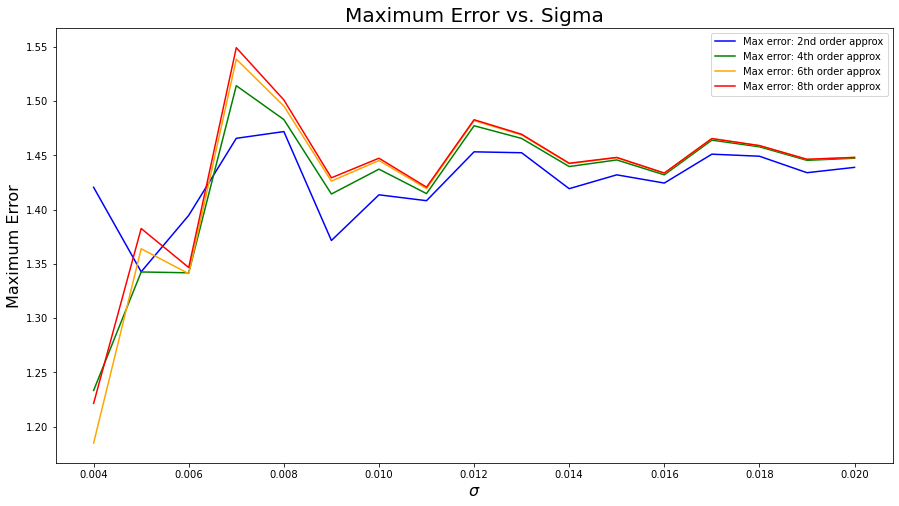

In [6]:
#plot max-error vs. sigma
plt.figure(figsize=(15, 8))
plt.plot(sigma_array, ERR_2, c='blue', label='Max error: 2nd order approx')
plt.plot(sigma_array, ERR_4, c='green', label='Max error: 4th order approx')
plt.plot(sigma_array, ERR_6, c='orange', label='Max error: 6th order approx')
plt.plot(sigma_array, ERR_8, c='red', label='Max error: 8th order approx')
plt.title('Maximum Error vs. Sigma', fontsize=20)
plt.xlabel('$\sigma$', fontsize=16)
plt.ylabel('Maximum Error', fontsize=16)
plt.legend()
plt.show()

**Q2-5:** Discuss how the maximum error changes as a function of $\sigma$ and approximation order, and speculate how this might affect the numerical computation of PDEs.

# DISCUSS!!!!!!!!!!!!!!!!!!!

## Part 3 - 2D Advection Equation (Realize in C for GPGN536)

**(1) PDE:** The 2D advection equation is written in the following way:

$$\frac{\partial U}{\partial t} + {\bf v}\cdot \nabla U = 0, \tag{5a}$$

or when expanded out in partial differential operators

$$\frac{\partial U}{\partial t} +v_x \frac{\partial U}{\partial x} +v_y \frac{\partial U}{\partial y} =0, \tag{5a}$$

where ${\bf v}=[v_x,v_y]$ are the components of the advection velocity.  The goal of this question is to solve the **2D Advection Equation** using a 2D version of the 1D Lax-Wendroff developed in the course notes, which will allow for transport of some disturbance (e.g., a pollutant in a lake) in some direction defined by 

$$\theta = {\rm atan}\left(\frac{v_y}{v_x} \right), \tag{6} $$

defined on $x,y\in[0,1]$.

**(2) Boundary Conditions:** You may assume  the following **boundary conditions**: 

$$U(x=0,y)= U(x=1,y) = U(x,y=0) = U(x=1,y) = 0, \tag{8}$$ 

which means that there zero disturbance (i.e., pollutant in the lake) reaches the bounday.

**(3) Initial Conditions: **We are going to assume that the **initial conditions** of the disturbance is given by a 2D Gaussian function

$$U_0(x,y,t=0) = {\rm exp} \left( \frac{-(x-x_0)^2-(y-y_0)^2}{2\sigma^2}  \right) \tag{7}$$

where $\sigma = 0.05$ and $[x_0,y_0]=[0.5,0.5]$.  I've defined and plotted the 2D Gaussian function below:

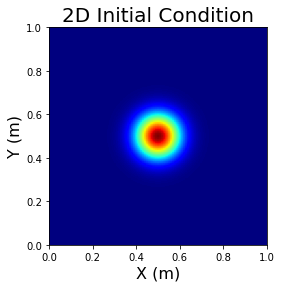

In [7]:
## . . Time axis parameters
nt,dt=121,0.01

## . . Space axis parameters
xmin,xmax,ymin,ymax=0,1,0,1
nx,ny=101,101
xx = np.linspace(xmin,xmax,nx)
yy = np.linspace(ymin,ymax,ny)
dx = xx[1]-xx[0]
dy = yy[1]-yy[0]

## . . Initial Condition
sigma=0.05
mx = (xmax-xmin)/2
my = (ymax-ymin)/2
U = np.zeros((nx,ny))

xxx, yyy = np.meshgrid(xx, yy, sparse=True)

U = np.exp(-(xxx-mx)**2/((2*sigma)**2)-(yyy-my)**2/((2*sigma)**2))

plt.figure()
plt.imshow(U,cmap='jet',extent=[xmin,xmax,ymin,ymax])
plt.xlabel('X (m)',fontsize=16);plt.ylabel('Y (m)',fontsize=16);
plt.title('2D Initial Condition',fontsize=20)
plt.show()

**Q3-1:** Write the discretized version of the 2D advection equation using a modified version of the Lax-Wendroff numerical scheme in the course notes.

In [8]:
## . . Your answer to Q3-1 goes here

**Q3-2:** Write a function that inputs the following:

   * Solution at time step $t$
   * Discretization intervals: $dt$, $dx$ and $dy$.
   * Velocity components: $v_x$ and $v_y$
   * Boundary conditions 

and then calculates the 2D advection equation solution update at time step $t+\Delta t$ that also enforces the boundary conditions.

In [9]:
## . . Your answer to Q3-2 goes here

**Q3-3:** Now write the code that time steps the 2D advection equation solution from the initial condition at time $t=0$ s a total of $nt=121$ steps at the given step of $dt=0.01$ s. You are required to advect the solution in a NW=$315^\circ$ direction. You may use combination of $v_x$ and $v_y$ that satisfy this direction; however, your solution should be stable.  Make a plot of the solution every 40 time steps. 

**Q3-4:** What happens if you increase the time discretization interval to $dt=0.02$ s? Describe what you observe.

In [10]:
## . . Your answer to Q3-4 goes here

**Q3-5:** Let's now say that you had a spatially variable advection velocity field. How would you have to modify your code above to handle this scenario? (You don't have to actually do it for this question.)

In [11]:
## . . Your answer to Q3-5 goes here

**(GPGN536 Only) Q3-6**: Describe the calculation time difference between using 1 core vs 2 cores. 

In [12]:
## . . Your answer to Q3-6 goes here